In [1]:
import datetime as dt
import pandas as pd
import qgrid
import numpy as np
import matplotlib.pyplot as plt
import math as math 
import MathsUtilities as MUte
import CAMP as camp
import DayLengthFunctions as DLF
from matplotlib.patches import Polygon
%matplotlib inline
pd.set_option('display.max_rows',1000)

In [2]:
CBcolors = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
} 

Text(0.5, 0, 'temperature')

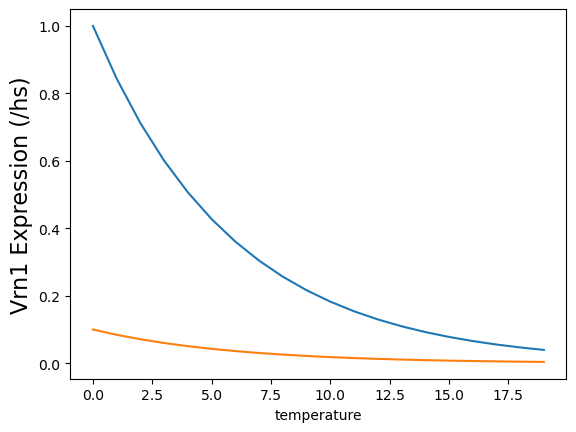

In [3]:
dv1 = pd.DataFrame(index = range(24),columns=['dVrn1'])
dv2 = pd.DataFrame(index = range(24),columns=['dVrn1'])
for x in dv1.index:
    dv1.loc[x,'dVrn1'] = camp.CalcColdUpRegVrn1(x,1,1,-0.17) #* camp.CalcdHS(x,1,1,.01,0,.03)    
    dv2.loc[x,'dVrn1'] = camp.CalcColdUpRegVrn1(x,1,0.1,-0.17) #* camp.CalcdHS(x,1,1,.01,0,.03)    
plt.plot(dv1[:20])
plt.plot(dv2[:20])
plt.ylabel('Vrn1 Expression (/hs)',fontsize=16)
plt.xlabel('temperature')

Text(0.5, 0, 'temperature')

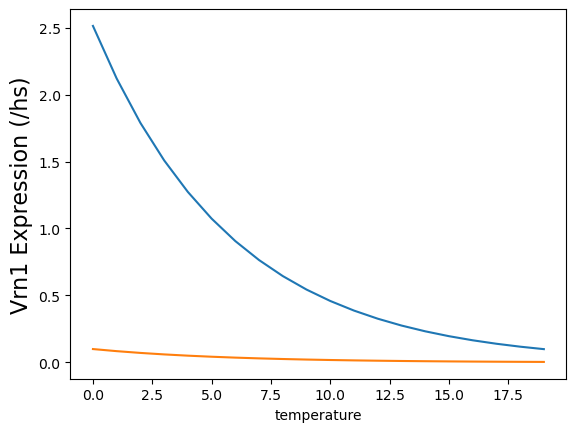

In [4]:
dv1 = pd.DataFrame(index = range(24),columns=['dVrn1'])
dv2 = pd.DataFrame(index = range(24),columns=['dVrn1'])
for x in dv1.index:
    dv1.loc[x,'dVrn1'] = camp.CalcColdUpRegVrn1(x,1,2.5123,-0.17) #* camp.CalcdHS(x,1,1,.01,0,.03)    
    dv2.loc[x,'dVrn1'] = camp.CalcColdUpRegVrn1(x,1,0.1,-0.17) #* camp.CalcdHS(x,1,1,.01,0,.03)    
plt.plot(dv1[:20])
plt.plot(dv2[:20])
plt.ylabel('Vrn1 Expression (/hs)',fontsize=16)
plt.xlabel('temperature')

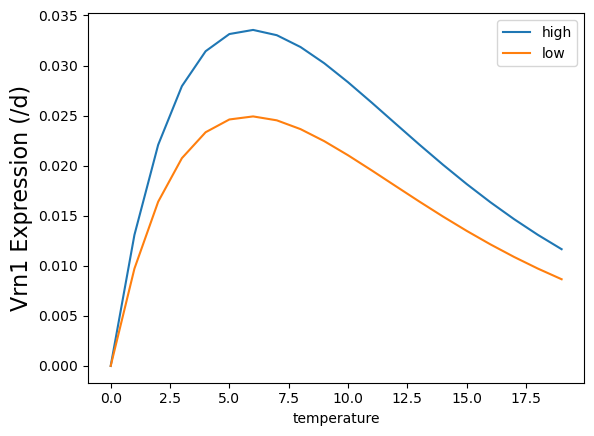

In [5]:
dv1 = pd.DataFrame(index = range(24),columns=['dVrn1'])
dv2 = pd.DataFrame(index = range(24),columns=['dVrn1'])
for x in dv1.index:
    dv1.loc[x,'dVrn1'] = camp.CalcColdUpRegVrn1(x,1,1.5123,-0.17) * camp.CalcdHS(x,1,1,100,0.3) 
    dv2.loc[x,'dVrn1'] = camp.CalcColdUpRegVrn1(x,1,1.123,-0.17) * camp.CalcdHS(x,1,1,100,0.3)  
plt.plot(dv1[:20],label='high')
plt.plot(dv2[:20],label = 'low')
plt.ylabel('Vrn1 Expression (/d)',fontsize=16)
plt.xlabel('temperature')
plt.legend()

In [6]:
CultParams = pd.read_excel('..\CampVrnParams.xlsx',engine='openpyxl',index_col=0)

In [7]:
def AddVrnPlot(CAMPOutputs,ax,CultName,ylab,xlab,leg):
    lines=['--','--','--',':','--','-',':']
    colors=[CBcolors['gray'],CBcolors['blue'],CBcolors['orange'],CBcolors['orange'],CBcolors['purple'],'k','k']
    p=0
    vars = ['VrnB','Vrn1','MaxVrn2','Vrn2','Vrn3','ApDev','MaxApDev']
    for var in vars:
        y = CAMPOutputs.loc[:,var].where(CAMPOutputs.loc[:,var]!=0,np.nan)
        plt.plot(CAMPOutputs.loc[:,'HS'],y,label=var,lw=3,color=colors[p],ls=lines[p])
        p+=1
    TickLabs = CAMPOutputs.loc[:,'Stage'].dropna()
    TickPoss = CAMPOutputs.loc[TickLabs.index,'HS']
    plt.plot([-2,TickPoss.iloc[2],np.nan,-2,TickPoss.iloc[3]],[1,1,np.nan,2,2],ls='dotted',color='k')
    SetStageTicks(CAMPOutputs,ax,TickLabs,TickPoss)
    if ylab == True:
        plt.ylabel('AppVrn expression',fontsize=12)
    else:
        plt.tick_params(axis='y', labelleft=False)
    if xlab == True:
        plt.xlabel('Haun Stage',fontsize=12)
    if leg == True:
        plt.legend(loc=1)

def SetStageTicks(CAMPOutputs,ax,TickLabs,TickPoss):
    TickLabs = ['$G$','$E$','$VI^{HS}$\n('+'%.1f'%TickPoss.iloc[2]+')','$TS^{HS}$\n('+'%.1f'%TickPoss.iloc[3]+')','$FL^{HS}$\n('+'%.1f'%TickPoss.iloc[4]+')']
    heights = [0,0,1,2,2]
    pos=0
    for x in TickPoss:
        plt.plot([x,x],[0,heights[pos]],'--',color='k',lw=1)
        pos+=1
    ax.xaxis.set_major_locator(plt.FixedLocator(TickPoss))
    ax.set_xticklabels(TickLabs)
    plt.tick_params(bottom=True,top=False, rotation=0, labelsize=10)
    
def AddTreatInfo(D,T1,P1,T2,P2,Cult,ax,xmax,basePhyllo,germHS):
    plt.plot([germHS+(D*T1)/basePhyllo]*2,[-1,100],'-',color='k',lw=4)
    ax.axvspan(germHS,germHS+(D*T1)/basePhyllo,alpha=0.2,color='k')
    plt.title(Cult,loc='right',fontsize=18)
    if D != 0:
        plt.text((D*T1)/basePhyllo/xmax-.02,0.95,str(T1) + r'$^oC $ ' + str(P1) + 'h ',
                 horizontalalignment='right', fontsize=18, transform=ax.transAxes,
                weight='extra bold',bbox=dict(facecolor='lightgrey', alpha=0.5))
    plt.text((D*T1)/basePhyllo/xmax+.02,0.95,' '+str(T2) + r'$^oC$ ' + str(P2) + 'h',
             horizontalalignment='left', fontsize=18, transform=ax.transAxes,
             weight='extra bold',bbox=dict(facecolor='white', alpha=0.5))
    
def MakeSingleScenarioVrnGraph2(Expt,PpN,VrnN,CultName,Rows,Cols,pos,Fig,TtEmerge,
                                ylab=True,xlab=True,leg=True,lab=False,xmax=20,ymax=2.5):
    
    D1,T1,P1,T2,P2 = TreatParams.loc[(Expt,PpN,VrnN),:].values
    Days = 300
    Day = range(Days)
    Tt1 = [T1] * D1; Pp1 = [P1] * D1
    Tt2 = [T2] * (Days - D1); Pp2 = [P2] * (Days - D1)
    Tt = Tt1 + Tt2; Pp = Pp1 + Pp2
    Params = CultParams.loc[CultName,:]
    CAMPOutputs = camp.CAMPmodel('',Day,Tt,Pp,Params,
                                   camp.CampConstants,TtEmerge=TtEmerge)
    ax = Fig.add_subplot(Rows,Cols,pos)
    plt.xlim(-1.5,xmax)
    plt.ylim(0,ymax)
    AddVrnPlot(CAMPOutputs,ax,CultName,ylab,xlab,leg)
    plt.plot(Params.loc['VI_'+VrnN+PpN],[1],'o',ms=10,color='k')
    plt.plot(Params.loc['TS_'+VrnN+PpN],[2],'o',ms=10,color='k')
    if (lab==True):
        plt.text(0.05,0.95,VrnN+PpN,transform=ax.transAxes)
    #AddTreatInfo(D1,T1,P1,T2,P2,CultName,ax,xmax,Params['BasePhyllo'],-(TtEmerge/Params['BasePhyllo']))
    
TreatParams = pd.DataFrame(index = pd.MultiIndex.from_product([['LaTrobe','Lincoln'],['L','S'],['C','W']],names=['Expt','Pp','Vern']),
             columns=['D1','T1','P1','T2','P2'],
            data = [[60,6,16,23,16],
                    [0,6,16,23,16],
                    [60,6,8,23,8],
                    [0,6,8,23,8],
                    [90,1,0,23,16],
                    [0,1,0,23,16],
                    [90,1,0,23,8],
                    [0,1,0,23,8]])

In [8]:
camp.CampConstants

{'k': -0.17,
 'VIThreshold': 1.0,
 'TSThreshold': 2.0,
 'SlopeFLNvsTS': 1.1,
 'IntFLNvsTS': 2.85,
 'PpMax': 16,
 'PpMin': 8}

In [9]:
CultInputs = pd.read_excel('..\CampVrnParams.xlsx',engine='openpyxl',index_col=0)  

([<matplotlib.axis.YTick at 0x20d5dfce200>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0')])

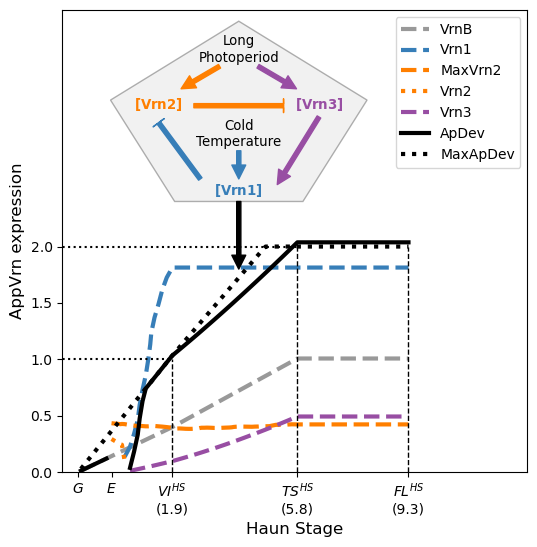

In [10]:
Fig = plt.figure(figsize=(6,6))
length = 300
startD = 200
startY = 2001
CultName = 'PNBattenWinter'
Days = list(range(startD,366))+list(range(1,startD+length-366))
Pp = []
for d in Days:
    Pp.append(DLF.day_length(d, -42, -6))
LincolnMet = pd.read_csv('lincoln.met',delim_whitespace=True,skiprows=[0,1,2,3,4,5,7],index_col=['year','day'])
StartT = LincolnMet.loc[(startY,startD),'mean']
Tt = [StartT]
StartTloc = LincolnMet.index.get_loc((startY,startD))
c = 1
while c < length:
    Tt.append(LincolnMet.iloc[c+StartTloc,:].loc['mean'])
    c+=1
Params = CultInputs.loc[CultName,:]
CAMPOutputs = camp.CAMPmodel('',Days,Tt,Pp,Params,
                               camp.CampConstants,TtEmerge=100)
ax = Fig.add_subplot(1,1,1)
plt.xlim(-1.5,13)
plt.ylim(0,4.1)
AddVrnPlot(CAMPOutputs,ax,CultName,True,True,True)

hc = 4
vc = 3
ts = 8
polygon1 = Polygon([(hc-4,vc+.3), (hc,vc+1), (hc+4,vc+.3),(hc+2,vc-.6),(hc-2,vc-.6)],color='lightgrey',alpha=0.3,ec='k')
#fig, ax = plt.subplots(1,1)
ax.add_patch(polygon1)
plt.text(hc,vc+.75,'Long\nPhotoperiod',fontsize=ts*1.2,horizontalalignment='center',verticalalignment='center')
plt.text(hc-2.5,vc+.26,r"$\bf{[Vrn2]}$",fontsize=ts*1.2,color=CBcolors['orange'],horizontalalignment='center',verticalalignment='center')
plt.text(hc+2.5,vc+.26,r"$\bf{[Vrn3]}$",fontsize=ts*1.2,color=CBcolors['purple'],horizontalalignment='center',verticalalignment='center')
plt.text(hc,vc-.5,r"$\bf{[Vrn1]}$",fontsize=ts*1.2,color=CBcolors['blue'],horizontalalignment='center',verticalalignment='center')
plt.text(hc,vc,'Cold\nTemperature',fontsize=ts*1.2,horizontalalignment='center',verticalalignment='center')
plt.annotate("",xy=(hc-1.8,vc+.4),xytext=(hc-.6,vc+.6),arrowprops=dict(color=CBcolors['orange'],headwidth=10, headlength=10, width=3)) #LPP to Vrn2
plt.annotate("",xy=(hc+1.8,vc+.4),xytext=(hc+.6,vc+.6),arrowprops=dict(color=CBcolors['purple'],headwidth=10, headlength=10, width=3)) #LPP to Vrn3
plt.annotate("",xy=(hc,vc-.4),xytext=(hc,vc-.15),arrowprops=dict(color=CBcolors['blue'],headwidth=10, headlength=10, width=3))  #Cold to Vrn1
plt.annotate("",xy=(hc+1.2,vc-.45),xytext=(hc+2.5,vc+.15),arrowprops=dict(color=CBcolors['purple'],headwidth=10, headlength=10, width=3)) #Vrn3 to Vrn1
plt.annotate("",xy=(hc+1.4,vc+.25),xytext=(hc-1.4,vc+.25),arrowprops=dict(color=CBcolors['orange'],headwidth=10, headlength=.1, width=3)) #Vrn2 to vrn3
plt.annotate("",xy=(hc-2.5,vc+.1),xytext=(hc-1.2,vc-.4),arrowprops=dict(color=CBcolors['blue'],headwidth=10, headlength=.1, width=3)) #Vrn1 to vrn2
plt.annotate("", xy=(hc,vc-1.2), xytext=(hc,vc-0.6), arrowprops=dict(color='k',headwidth=10, headlength=10, width=3)) # Vrn1 to apical development

plt.yticks([0,0.5,1.0,1.5,2.0])

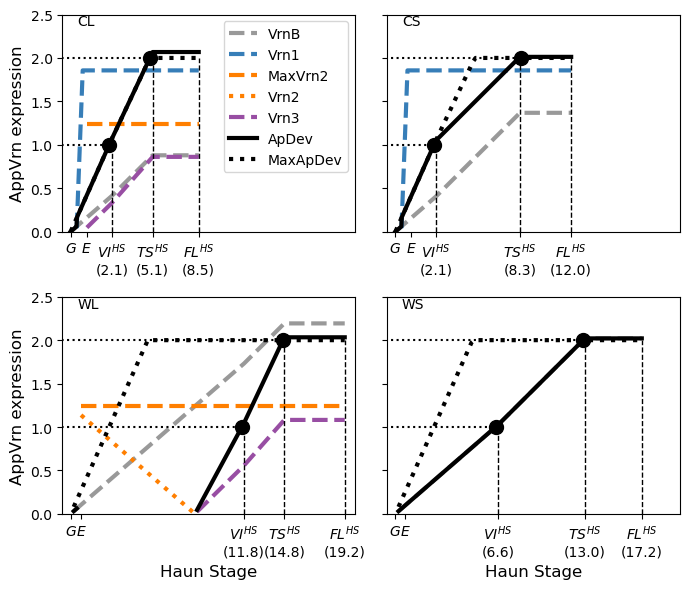

In [11]:
Fig = plt.figure(figsize=(7,6))
#First example
MakeSingleScenarioVrnGraph2('Lincoln','L','C','PNBattenWinter',2,2,1,Fig,90,True,False,True,True)
MakeSingleScenarioVrnGraph2('Lincoln','S','C','PNBattenWinter',2,2,2,Fig,90,False,False,False,True)
MakeSingleScenarioVrnGraph2('Lincoln','L','W','PNBattenWinter',2,2,3,Fig,90,True,True,False,True)
MakeSingleScenarioVrnGraph2('Lincoln','S','W','PNBattenWinter',2,2,4,Fig,90,False,True,False,True)
Fig.patch.set_facecolor('white')
plt.tight_layout()
#Fig.savefig('scenario.png')

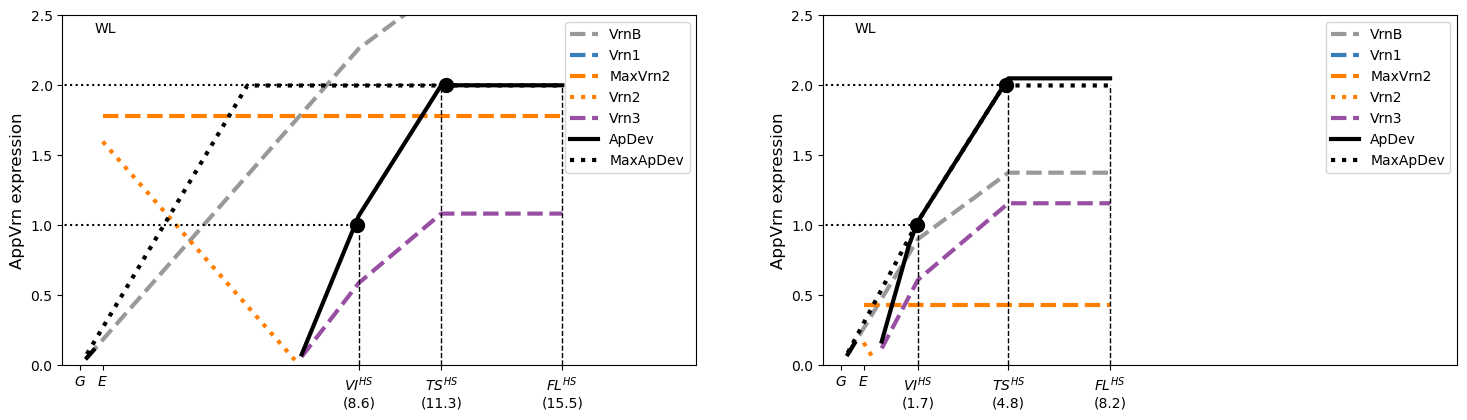

In [12]:
Fig = plt.figure(figsize=(18,10))
#First example
MakeSingleScenarioVrnGraph2('Lincoln','L','W','BattenWinter',2,2,1,Fig,90,True,False,True,True)
MakeSingleScenarioVrnGraph2('Lincoln','L','W','BattenSpring',2,2,2,Fig,90,True,False,True,True)
Fig.patch.set_facecolor('white')
#Fig.savefig('scenario.png')

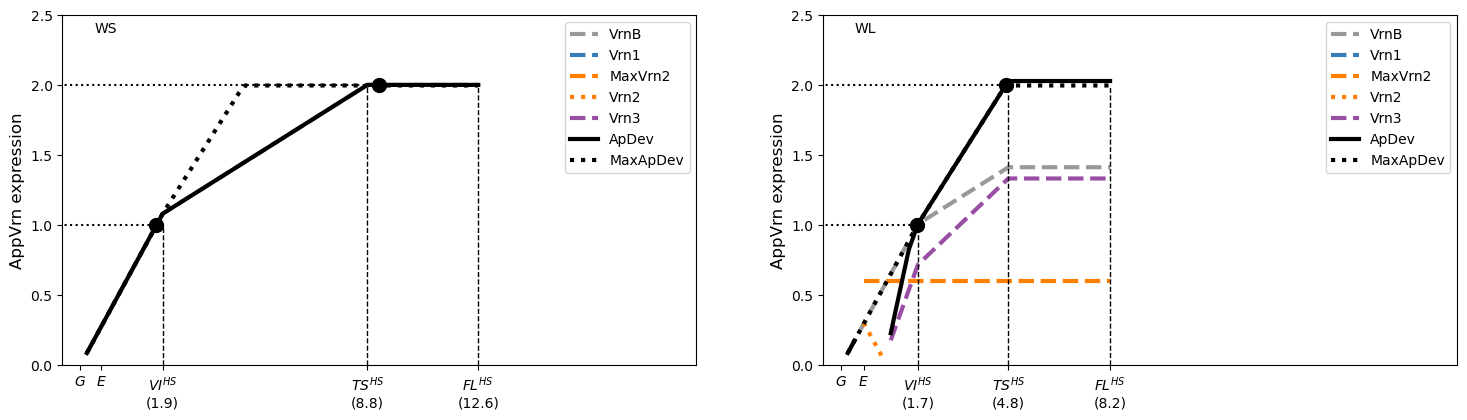

In [13]:
Fig = plt.figure(figsize=(18,10))
#First example
MakeSingleScenarioVrnGraph2('Lincoln','S','W','mccubbin',2,2,1,Fig,90,True,False,True,True)
MakeSingleScenarioVrnGraph2('Lincoln','L','W','mccubbin',2,2,2,Fig,90,True,False,True,True)
Fig.patch.set_facecolor('white')
#Fig.savefig('scenario.png')

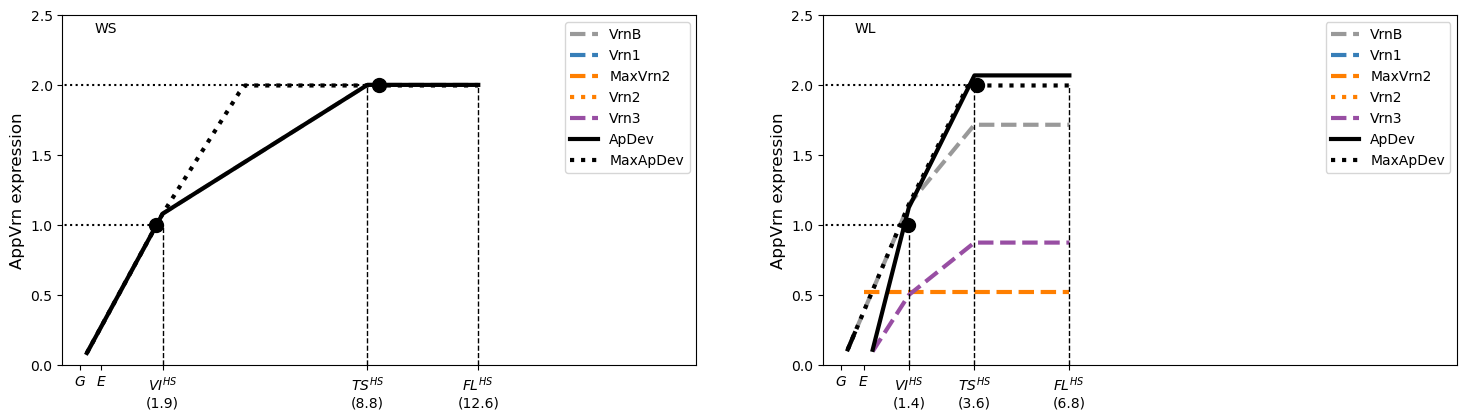

In [14]:
Fig = plt.figure(figsize=(18,10))
#First example

MakeSingleScenarioVrnGraph2('Lincoln','S','W','mccubbin',2,2,1,Fig,90,True,False,True,True)
MakeSingleScenarioVrnGraph2('Lincoln','L','W','Otane',2,2,2,Fig,90,True,False,True,True)
Fig.patch.set_facecolor('white')
#Fig.savefig('scenario.png')

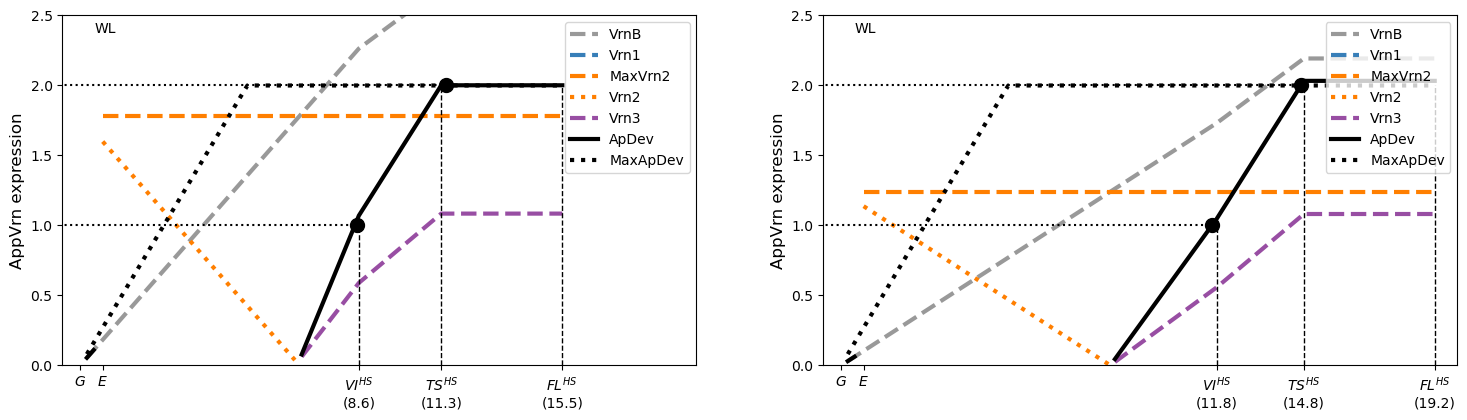

In [15]:
Fig = plt.figure(figsize=(18,10))
#First example

MakeSingleScenarioVrnGraph2('Lincoln','L','W','BattenWinter',2,2,1,Fig,90,True,False,True,True)
MakeSingleScenarioVrnGraph2('Lincoln','L','W','PNBattenWinter',2,2,2,Fig,90,True,False,True,True)
Fig.patch.set_facecolor('white')
#Fig.savefig('scenario.png')

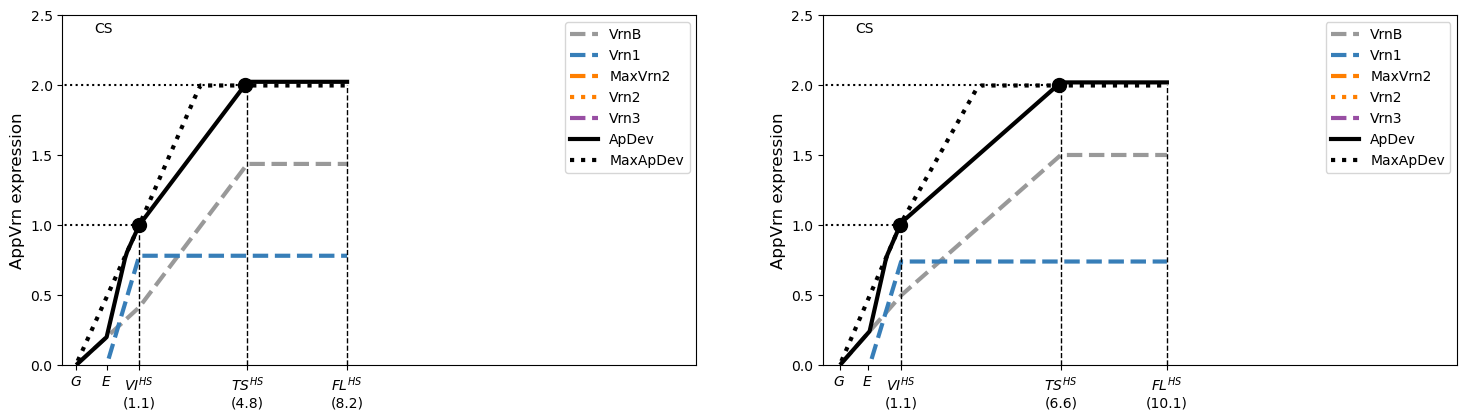

In [16]:
Fig = plt.figure(figsize=(18,10))
#First example

MakeSingleScenarioVrnGraph2('LaTrobe','S','C','H45',2,2,1,Fig,90,True,False,True,True)
MakeSingleScenarioVrnGraph2('LaTrobe','S','C','Derrimut',2,2,2,Fig,90,True,False,True,True)
Fig.patch.set_facecolor('white')
#Fig.savefig('scenario.png')

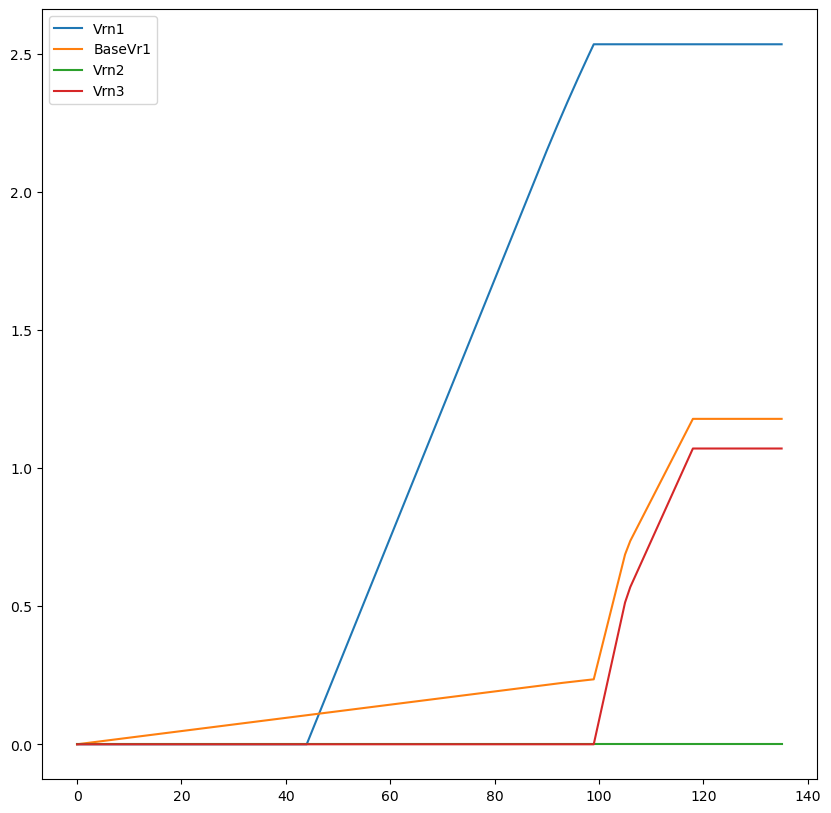

In [17]:
D1 = 100
T1 = 1
P1 = 0
T2 = 23.6
P2 = 16
CultName = 'BattenWinter'
Days = 200
Day = range(Days)
Tt1 = [T1] * D1; Pp1 = [P1] * D1
Tt2 = [T2] * (Days - D1); Pp2 = [P2] * (Days - D1)
Tt = Tt1 + Tt2; Pp = Pp1 + Pp2
test = camp.CAMPmodel('',Day,Tt,Pp,CultParams.loc[CultName,:],
                         camp.CampConstants,
                         TtEmerge=100,
                         )
# test.to_excel('test.xls',engine='openpyxl')
# test.to_csv('test.csv')
Fig = plt.figure(figsize=(10,10))
Fig.add_subplot(1,1,1)
plt.plot(range(test.index.size),test.loc[:,['Vrn1','VrnB','Vrn2','Vrn3']])
#plt.xlim(0,d*t + 1000)
#plt.plot([d*t]*2,[0,2])
plt.legend(labels=['Vrn1','BaseVr1','Vrn2','Vrn3'])
Fig.patch.set_facecolor('white')

In [18]:
PNCampInputs = CultInputs.loc[['BattenWinter','BattenSpring'],:]
PNCampInputs.loc[:,'minLAR'] = 0.0
PNCampInputs.loc[:,'TtEmerge'] = 90
PNCampInputs.loc[:,'k'] = camp.CampConstants['k']
PNCampInputs.loc[:,'VSThreshold'] = camp.CampConstants['VIThreshold']
PNCampInputs.loc[:,'TSThreshold'] = camp.CampConstants['TSThreshold']

PNCampInputs.loc[:,'VrnTreatTemp'] = 1
PNCampInputs.loc[:,'VrnTreatDuration'] = 90
PNCampInputs.loc['BattenWinter','FLN_WS'] = PNCampInputs.loc['BattenWinter','FLN_WS'] + 3.5 ## Correct to be consistent with BnJ Data
PNCampInputs.loc['BattenWinter','FLN_WL'] = PNCampInputs.loc['BattenWinter','FLN_WL'] + 3.5 ## Correct to be consistent with BnJ Data
PNCampInputs.loc['BattenSpring','FLN_WS'] = PNCampInputs.loc['BattenSpring','FLN_WS'] + 1.0 ## Correct to be consistent with BnJ Data
PNCampInputs.loc['BattenSpring','FLN_WL'] = PNCampInputs.loc['BattenSpring','FLN_WL'] + 1.0 ## Corr

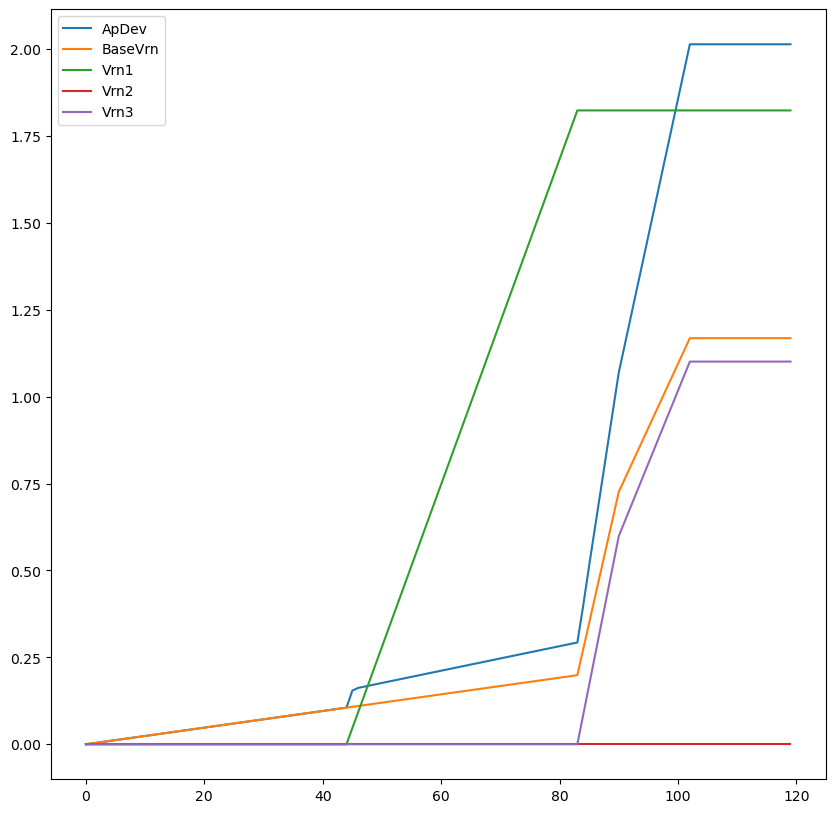

In [19]:
D1 = 84
T1 = 1
P1 = 0
T2 = 23.6
P2= 16
CultName = 'BattenWinter'
Params = CultParams.loc[CultName,:]
Days = 200
Day = range(Days)
Tt1 = [T1] * D1; Pp1 = [P1] * D1
Tt2 = [T2] * (Days - D1); Pp2 = [P2] * (Days - D1)
Tt = Tt1 + Tt2; Pp = Pp1 + Pp2
test = camp.CAMPmodel('',Day,Tt,Pp,Params,
                         camp.CampConstants,
                         TtEmerge=90)
#test.to_excel('test.xls',engine='openpyxl')
Fig = plt.figure(figsize=(10,10))
Fig.add_subplot(1,1,1)
plt.plot(range(test.index.size),test.loc[:,['ApDev','VrnB','Vrn1','Vrn2','Vrn3']])
plt.legend(labels=['ApDev','BaseVrn','Vrn1','Vrn2','Vrn3'])
Fig.patch.set_facecolor('white')

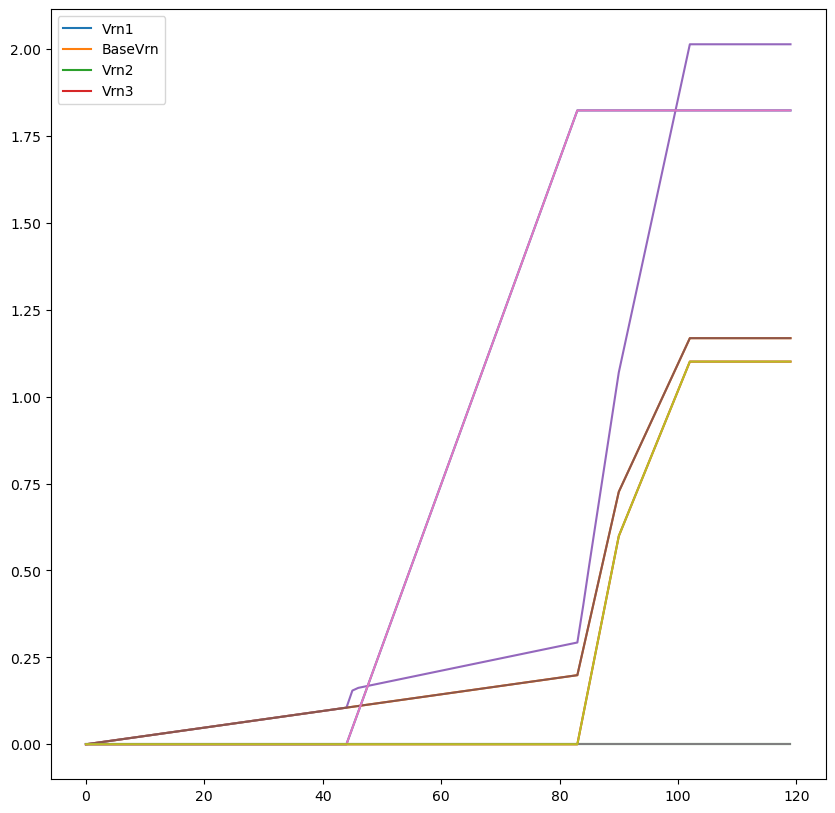

In [20]:
D1 = 84
T1 = 1
P1 = 0
T2 = 23.6
P2= 16
CultName = 'BattenWinter'
Params = CultParams.loc[CultName,:]
Days = 200
Day = range(Days)
Tt1 = [T1] * D1; Pp1 = [P1] * D1
Tt2 = [T2] * (Days - D1); Pp2 = [P2] * (Days - D1)
Tt = Tt1 + Tt2; Pp = Pp1 + Pp2
test2 = camp.CAMPmodel('',Day,Tt,Pp,Params,
                         camp.CampConstants,
                         TtEmerge=90)
Fig = plt.figure(figsize=(10,10))
Fig.add_subplot(1,1,1)
plt.plot(range(test2.index.size),test2.loc[:,['Vrn1','VrnB','Vrn2','Vrn3']])
plt.plot(range(test.index.size),test.loc[:,['ApDev','VrnB','Vrn1','Vrn2','Vrn3']])
plt.legend(labels=['Vrn1','BaseVrn','Vrn2','Vrn3'])
Fig.patch.set_facecolor('white')

## Unit tests

In [21]:
def CalcTreatCombs(Durats,Temps,Pps):
    UnitTestResults = pd.DataFrame()
    Dur = 150
    Day = range(Dur)
    FLN = 18
    BasePhyl = 100
    for d in Durats:
        for t in Temps:
            for p in Pps:
                Tt1 = [t] * d
                Tt2 = [23] * (Dur - d)
                Tt = Tt1 + Tt2
                Pp1 = [p] * d
                Pp2 = [16]  * (Dur - d)
                Pp = Pp1 + Pp2
                Outputs = camp.CAMPmodel('',Day,Tt,Pp,
                                         camp.deriveVrnParams(PNCampInputs.loc['BattenWinter',:].to_dict()),
                                         camp.CampConstants, TtEmerge=90)
                IndexedOutputs = pd.concat([Outputs],keys = [(d,t,p)],names = ['Durat','Temp','Pp','Days'])
                UnitTestResults = pd.concat([UnitTestResults,IndexedOutputs])
    return UnitTestResults

def AddData(Var,row,l,j,d,t,p,UniTestResults,axs):
    plt.sca(axs[row][0])
    plt.plot(UniTestResults.index,
             UniTestResults.loc[:,Var],
             lines[j],color=cols[l],lw=3,label = str(d) + ' days at ' + str(t) + 'oC ' + str(p) + 'h')
    if (l==0):
        plt.text(0.05,1.02,Var + ' vs DAS',transform=axs[row][0].transAxes,fontsize=18)
        plt.tick_params(labelsize=14)
    plt.sca(axs[row][1])    
    plt.plot(UniTestResults.loc[:,'HS'], 
             UniTestResults.loc[:,Var],
             lines[j],color=cols[l],lw=3,label = str(d) + ' days at ' + str(t) + 'oC ' + str(p) + 'h')
    if (l==0):
        plt.text(0.05,1.02,Var + ' vs HS',transform=axs[row][1].transAxes,fontsize=18)
        plt.tick_params(labelsize=14)
        
def GraphGeneExpression(UnitTestResults):
    fig, axs = plt.subplots(7,2,figsize=(18,50))
    plt.sca(axs[0][0])
    l=0
    for d in Durats:
        j=0
        for t in Temps:
            for p in Pps:
                plt.plot(UnitTestResults.loc[(d,t,p),'HS'],
                     lines[j],color=cols[l],lw=3,label = str(d) + ' days at ' + str(t) + 'oC ' + str(p) + 'h')
                j+=1
        l+=1
    plt.text(0.05,0.92,'HS vs DAS',transform=axs[0][0].transAxes,fontsize=18)
    plt.tick_params(labelsize=14)
    plt.legend(loc=(0,1.03),fontsize=16,ncol=4)
    plt.sca(axs[0][1])
    l=0
    for d in Durats:
        j=0
        for t in Temps:
            for p in Pps:
                plt.plot(UnitTestResults.loc[(d,t,p),'FLN'],
                     lines[j],color=cols[l],lw=3,label = str(d) + ' days at ' + str(t) + 'oC ' + str(p) + 'h')
                j+=1
        l+=1
    plt.text(0.05,0.92,'FLN vs DAS',transform=axs[0][1].transAxes,fontsize=18)
    plt.tick_params(labelsize=14)
    l=0
    for d in Durats:
        j=0
        for t in Temps:
            for p in Pps:
                AddData('VrnB',1,l,j,d,t,p,UnitTestResults.loc[(d,t,p),:],axs)
                AddData('MaxApDev',2,l,j,d,t,p,UnitTestResults.loc[(d,t,p),:],axs)
                AddData('ApDev',3,l,j,d,t,p,UnitTestResults.loc[(d,t,p),:],axs)
                AddData('Vrn1',4,l,j,d,t,p,UnitTestResults.loc[(d,t,p),:],axs)
                AddData('Vrn2',5,l,j,d,t,p,UnitTestResults.loc[(d,t,p),:],axs)
                AddData('Vrn3',6,l,j,d,t,p,UnitTestResults.loc[(d,t,p),:],axs)
                j+=1
        l+=1
    fig.patch.set_facecolor('white') 

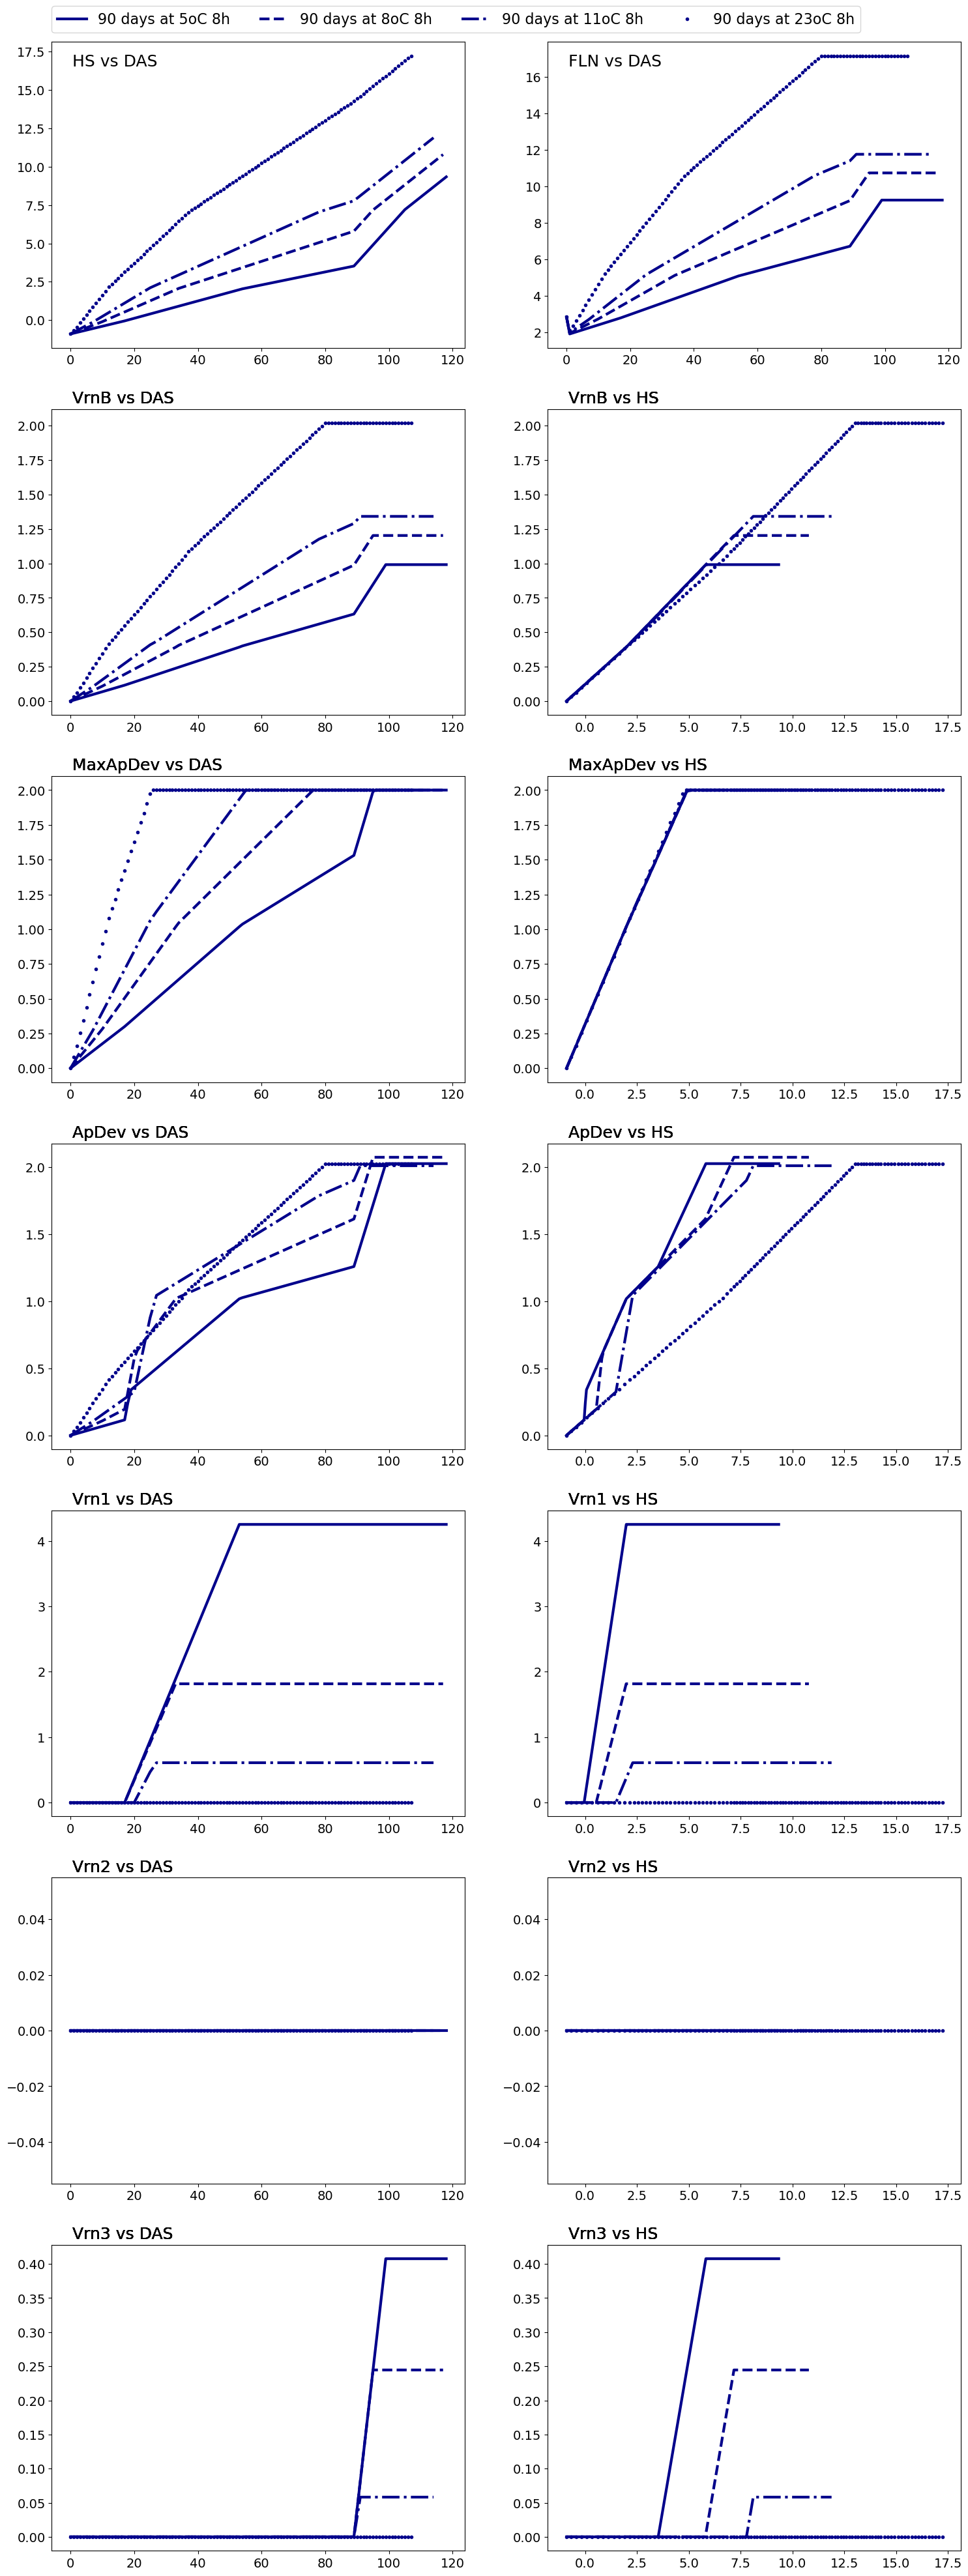

In [22]:
Durats = [90]
Temps = [5,8,11,23]
Pps = [8]
VernUnitTestResults = CalcTreatCombs(Durats,Temps,Pps)
cols = ['darkblue','b','g','r']
lines = ['-','--','-.','.']
GraphGeneExpression(VernUnitTestResults)

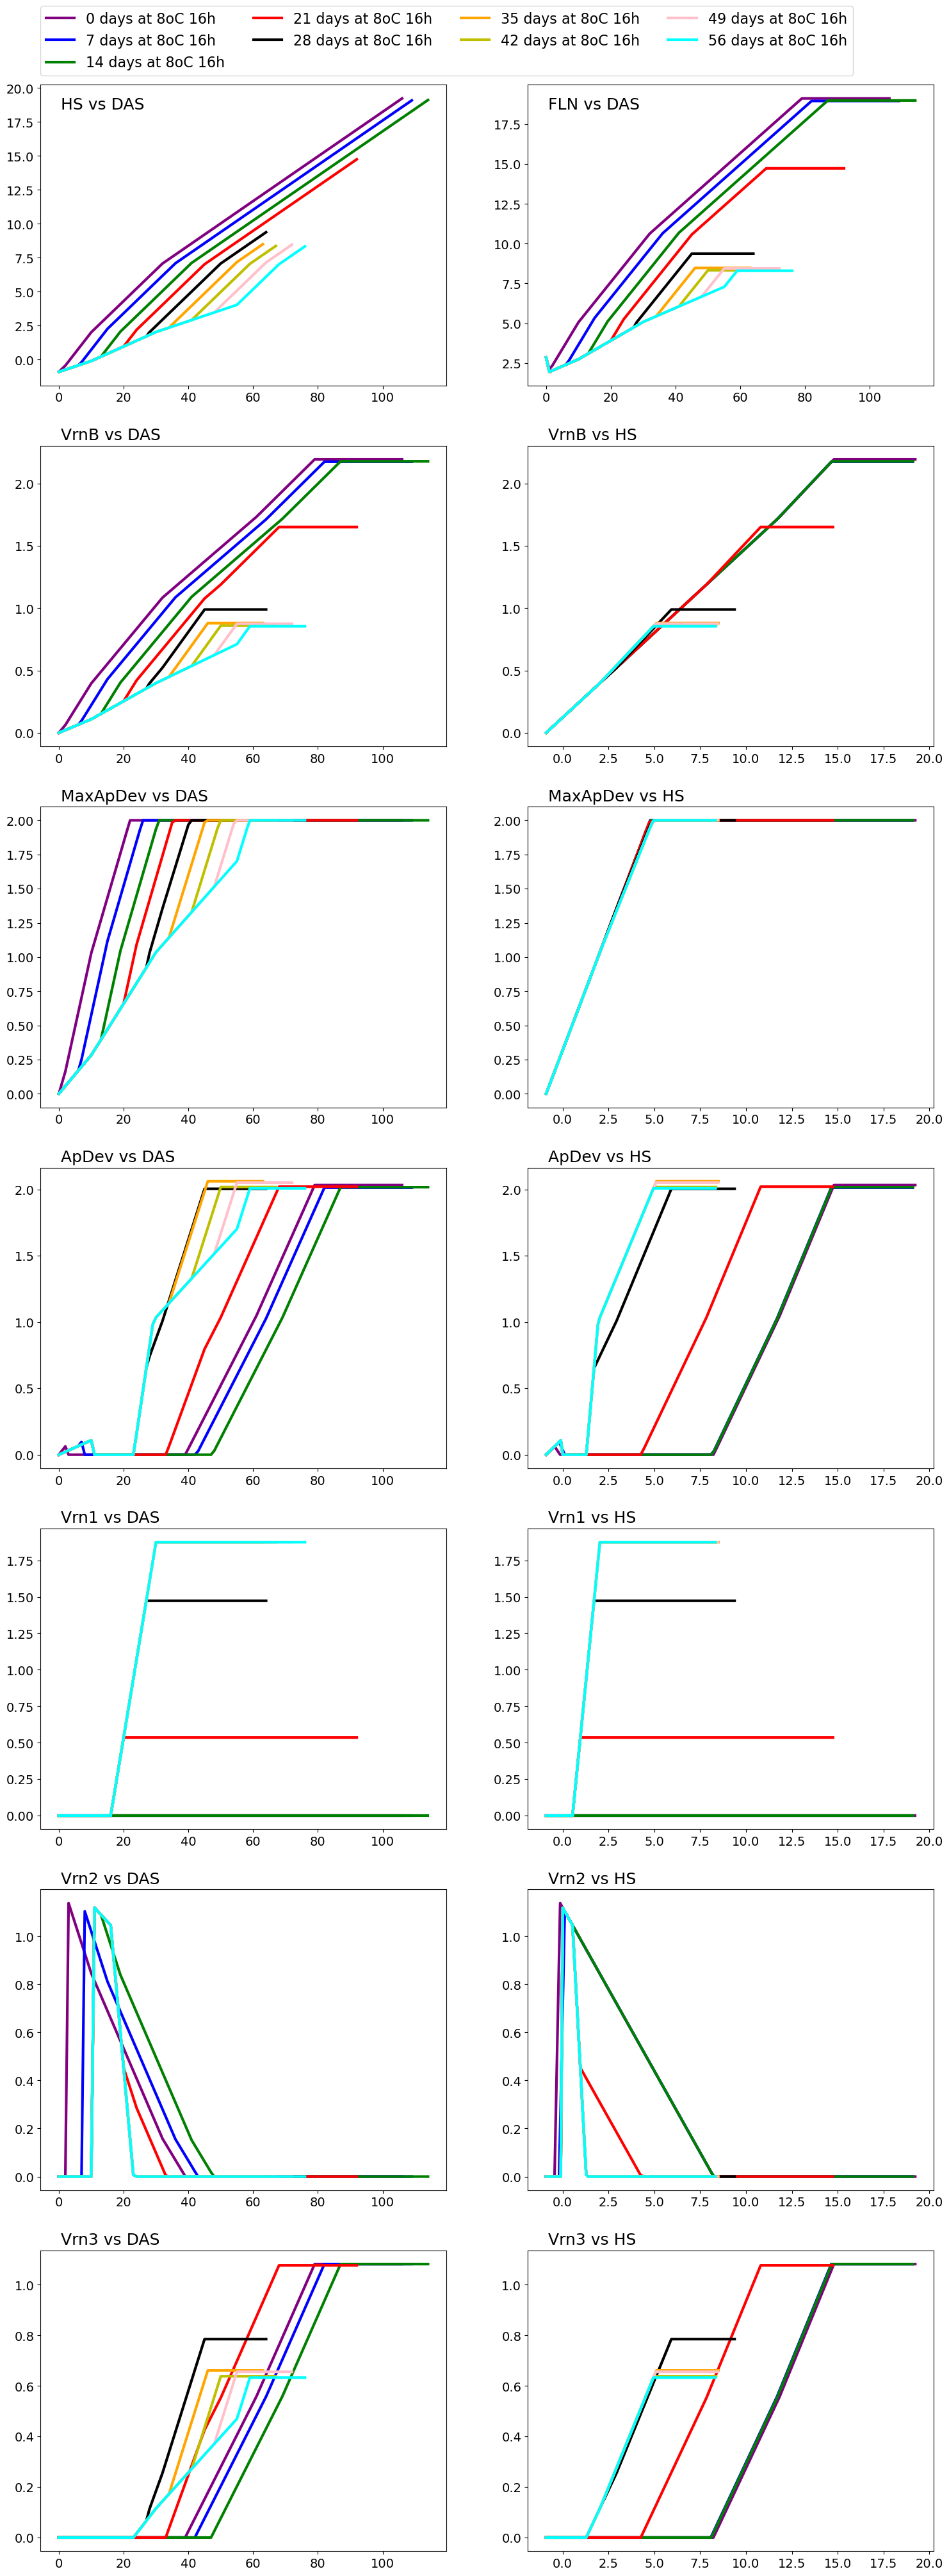

In [23]:
Durats = [0,7,14,21,28,35,42,49,56]
Temps = [8]
Pps = [16]
ShortPpUnitTestResults =  CalcTreatCombs(Durats,Temps,Pps)
cols = ['purple','b','g','r','k','orange','y','pink','cyan']
lines = ['-','--','-.','.']
GraphGeneExpression(ShortPpUnitTestResults)

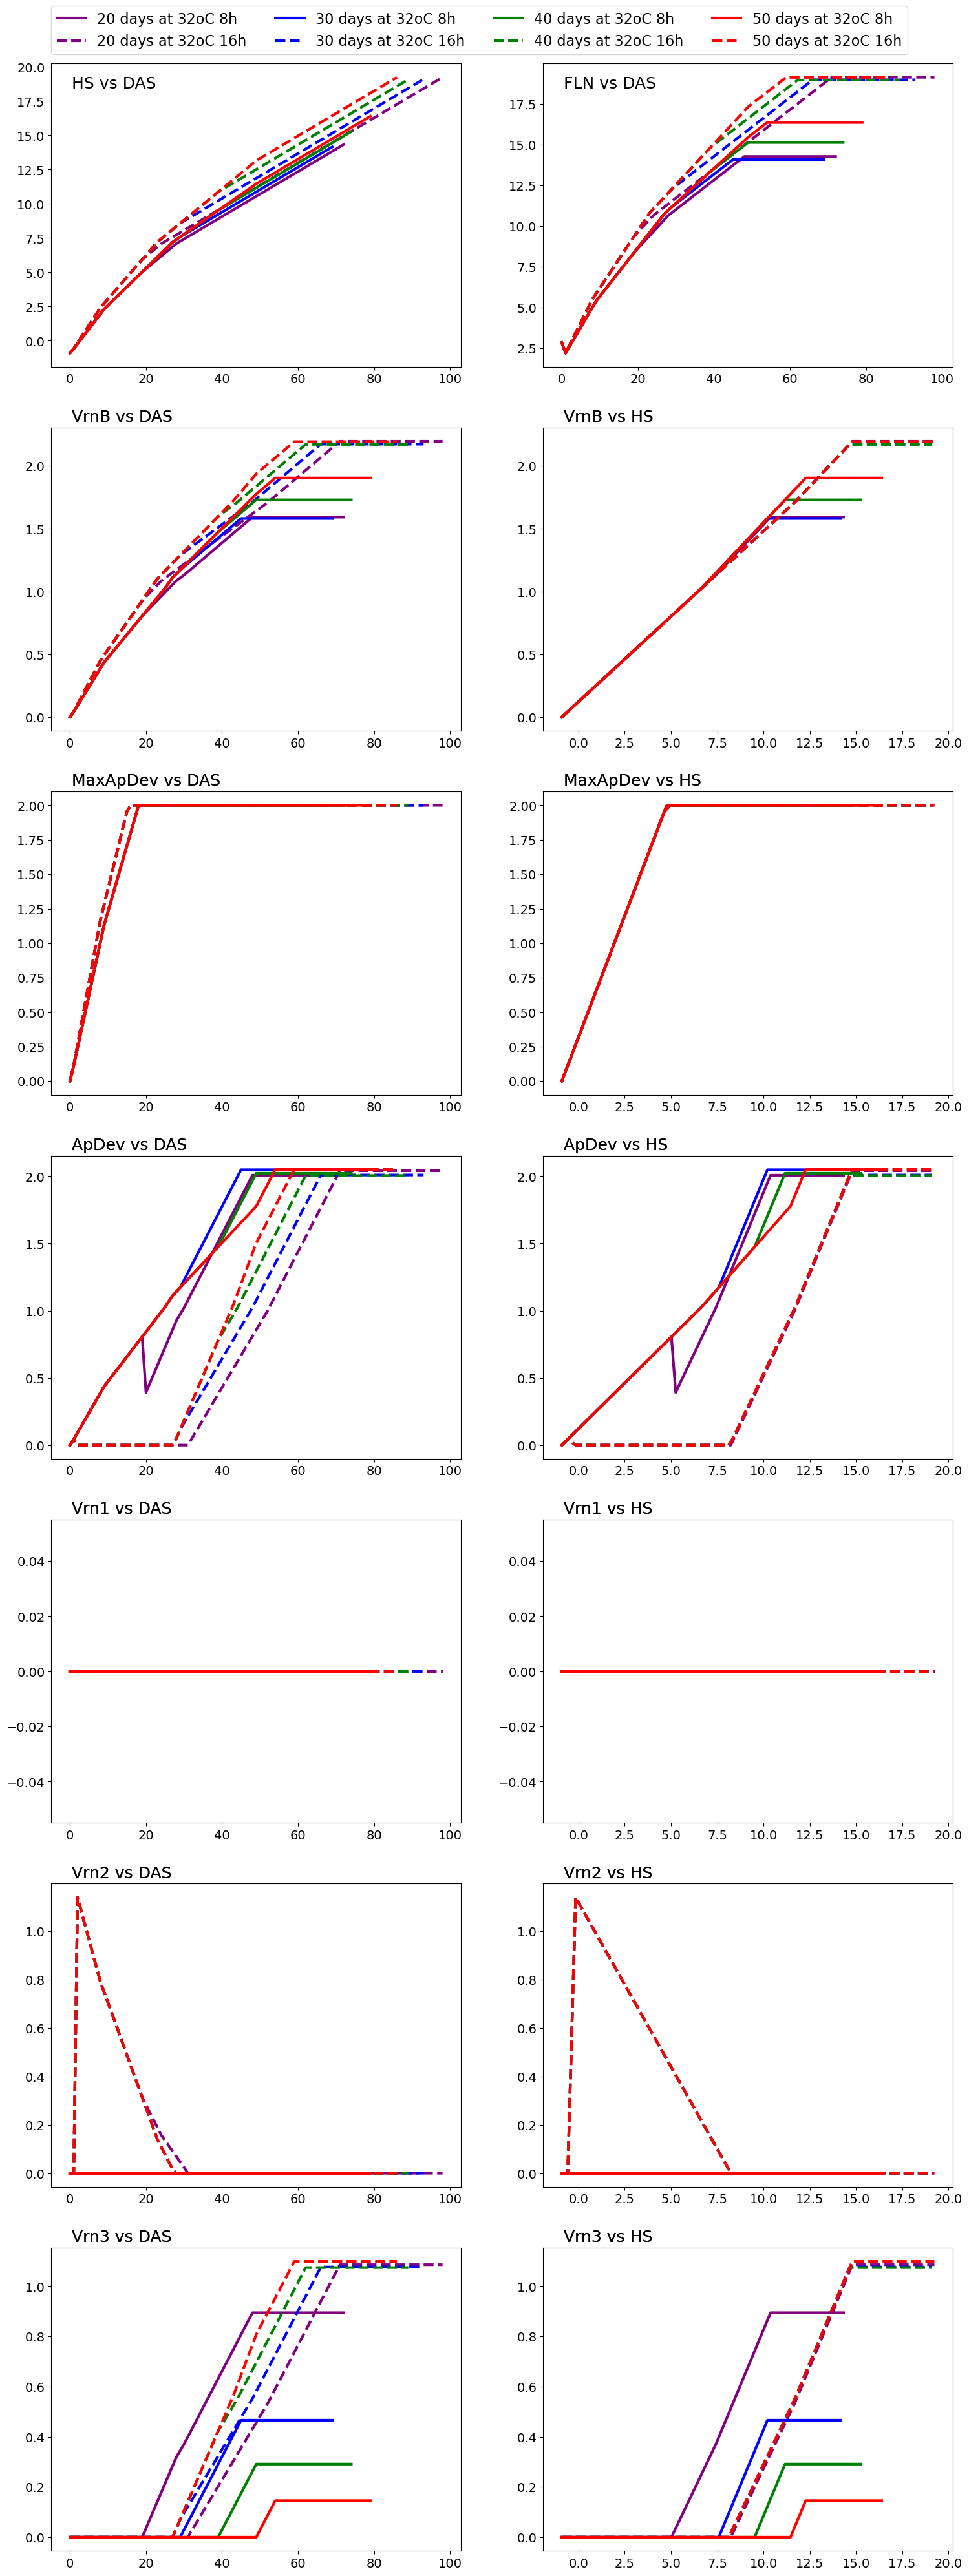

In [24]:
Durats = [20,30,40,50]
Temps = [32]
Pps = [8,16]
TestResults =  CalcTreatCombs(Durats,Temps,Pps)
cols = ['purple','b','g','r','k','orange','y','pink','cyan']
lines = ['-','--','-.','.']
GraphGeneExpression(TestResults)

In [25]:
Dont run past this point.  There are optimisations that are slow to rerun and not needed now they are run

SyntaxError: invalid syntax (2283337370.py, line 1)

## Do Optimisation for Vrn1 expression params

In [ ]:
CultParams

In [ ]:
#Slice out the BattenWinter data for Temp treatments at 16 degrees
VrnSetFilter = BnJFLN.index.isin([1,5,8,11],0) & BnJFLN.index.isin([0,16],1) & BnJFLN.index.isin(['BattenWinter'],3)
VrnTestSet = BnJFLN.loc[VrnSetFilter,:]
# Calculate FLN for selected treatment combinations using parameter permitations
#Ks = [-0.18,-0.1825,-0.185,-0.1875,-0.19,-0.1925,-0.195,-0.1975,-0.2]
#Ks = [-0.17,-0.1725,-0.175,-0.1775,-0.18,-0.1825,-0.185,-0.1875,-0.19]
Ks = [-0.175,-0.18,-0.185,-0.19,-0.195,-0.2,-0.205]
MTs = [0.3,0.4,0.5, 0.6,0.7]
for K in Ks:
    for MT in MTs:
        CultParams = pd.DataFrame(index = ['BattenWinter'],
                              columns = camp.CultivarParamList)
        CultParams.loc['BattenWinter',:] = camp.CalcCultivarVrnCoeffs(BnJFLNData.loc[('BattenWinter','Full',16),'FLN'],
                                                    BnJFLNData.loc[('BattenWinter','Nil',16),'FLN'],
                                                    BnJFLNData.loc[('BattenWinter','Full',8),'FLN'],
                                                    BnJFLNData.loc[('BattenWinter','Nil',8),'FLN'],
                                                    camp.CampConstants['TreatmentTtDuration'],
                                                    camp.CampConstants['BasePhyllochron'],
                                                    camp.CampConstants['VrnTreatTemp'],
                                                    K,
                                                    camp.CampConstants['TtEmerge'],
                                                    camp.CampConstants['VernSatThreshold'],
                                                    MT)
        CultParams.loc['BattenWinter','MaxLAR'] = PhylloCoeffData.loc['BattenWinter','[Structure].MaxLAR.FixedValue']
        CultParams.loc['BattenWinter','MinLAR'] = 0.0
        CultParams.loc['BattenWinter','PTQhf'] = PhylloCoeffData.loc['BattenWinter','[Structure].PTQhf.FixedValue']
        for Trt in VrnTestSet.index:
            Day = range(200)
            Tt = ClimateLabEnvironment.loc['Tt',Trt[:-1]]
            Pp = ClimateLabEnvironment.loc['Pp',Trt[:-1]]
            Params = CultParams.loc[Trt[3],:]
            GEPFLN = camp.CAMPmodel('FLN',Day,Tt,Pp,CultParams.loc['BattenWinter',:],
                        camp.CampConstants['BasePhyllochron'],
                        K,
                        camp.CampConstants['BaseVrn2'],
                        camp.CampConstants['VernSatThreshold'],
                        MT,
                        camp.CampConstants['JuvenileHS'],
                        camp.CampConstants['BaseDVrnX'])

            VrnTestSet.loc[Trt,'Pred' + 'K' + str(K) + 'MT' + str(MT)] = GEPFLN

In [ ]:
#Calculate stats for each paramter combination
FitsIndex = pd.MultiIndex.from_product([Ks,MTs])
Fits = pd.DataFrame(index = FitsIndex)
Obs = VrnTestSet.loc[:,'FLN'].values
for K in Ks:
    for MT in MTs:
        Pred = VrnTestSet.loc[:,'Pred' + 'K' + str(K) + 'MT' + str(MT)].values
        plt.plot(Obs,Pred,'o')
        fit = MUte.MathUtilities.CalcRegressionStats('FLN',Pred,Obs)
        Fits.loc[(K,MT),'NSE'] = fit.NSE
        Fits.loc[(K,MT),'RSR'] = fit.RSR
        Fits.loc[(K,MT),'RMSE'] = fit.RMSE
        Fits.loc[(K,MT),'R2'] = fit.R2

In [ ]:
# Graph predictions and Ovservations to check predicted patterns make sense
Graph = plt.figure(figsize=(10,10))
pos=1
colors = ['r','orange','y','g','b','cyan','r','orange','y','g','b','cyan']
lines = ['-','--','-.',':','-','--','-.',':']
for t in [1,5,8,11]:
    ax = Graph.add_subplot(2,2,pos)
    plt.plot(VrnTestSet.loc[t,'Duration'],VrnTestSet.loc[t,'FLN'],
             'o',color='k',ms=10)
    colpos = 0
    for K in Ks:
        for MT in MTs:
            plt.plot(VrnTestSet.loc[t,'Duration'], VrnTestSet.loc[t,'Pred' + 'K' + str(K)+ 'MT' + str(MT)],
                color = colors[colpos])
        colpos +=1
    pos +=1
    plt.title('Treatment Temp = ' + str(t) + 'oC')
plt.ylabel('Final Leaf Number')
plt.xlabel('Duration at Temp Treatment')
Graph.patch.set_facecolor('white')

In [ ]:
#Graph stats for each parameter combination to determine best fit.
Graph = plt.figure(figsize=(10,10))
pos=1
colors = ['r','orange','y','g','b','pink','cyan','r','orange','y','g','b','pink','cyan']
lines = ['-','--','-.','.']
Hatches = ['/', '\\', '+', 'x', 'o', '*']
for stat in ['NSE','RSR','RMSE','R2']:
    ax = Graph.add_subplot(2,2,pos)
    x=0
    hatchpos = 0
    for K in Ks:
        colpos = 0
        for MT in MTs:
            plt.bar(x,Fits.loc[(K,MT),stat],color=colors[colpos],label=str(K) + " " + str(MT),hatch = Hatches[hatchpos])
            x +=1
            colpos +=1
        hatchpos +=1
    pos +=1
    plt.title(stat)
    if stat == 'NSE':
        plt.legend(title='K',ncol=4,loc=(.5,1.1))
    tickposs = [2]
Graph.patch.set_facecolor('white')

## Do Optimisation for Vrn2 expression params

In [ ]:
#Slice out the BattenWinter data for Temp treatments at 16 degrees
SDVrnSetFilter = BnJFLN.index.isin([1,11,23],0) & BnJFLN.index.isin([0,8,16],1) & BnJFLN.index.isin(['BattenWinter'],3)
SDVrnTestSet = BnJFLN.loc[SDVrnSetFilter,:]
# Calculate FLN for selected treatment combinations using parameter permitations
V2ls = [0,0.3,0.6,0.9,1.2]
MU2s = [-0.018, -0.022, 0.026, -0.03, -0.34]
for MU2 in MU2s:
    for V2l in V2ls:
        for Trt in SDVrnTestSet.index:
            Day = range(200)
            Tt = ClimateLabEnvironment.loc['Tt',Trt[:-1]]
            Pp = ClimateLabEnvironment.loc['Pp',Trt[:-1]]
            Params = CultParams.loc[Trt[3],:]
            GEPFLN = CAMPmodel('FLN',Day,Tt,Pp,Params,MUdVrn2=MU2,HSlagVrn2=V2l)
            SDVrnTestSet.loc[Trt,'Pred' + 'MU' + str(MU2) + 'K' + str(V2l)] = GEPFLN
#Calculate stats for each paramter combination
FitsIndex = pd.MultiIndex.from_product([MU2s,V2ls])
Fits = pd.DataFrame(index = FitsIndex)
Obs = SDVrnTestSet.loc[:,'FLN'].values
for MU2 in MU2s:
    for V2l in V2ls:
        Pred = VrnTestSet.loc[:,'Pred' + 'MU' + str(MU2) + 'K' + str(V2l)].values
        plt.plot(Obs,Pred,'o')
        fit = MUte.MathUtilities.CalcRegressionStats('FLN',Pred,Obs)
        Fits.loc[(MU1,K),'NSE'] = fit.NSE
        Fits.loc[(MU1,K),'RSR'] = fit.RSR
        Fits.loc[(MU1,K),'RMSE'] = fit.RMSE
        Fits.loc[(MU1,K),'R2'] = fit.R2

In [ ]:
FitsIndex = pd.MultiIndex.from_product([MU2s,V2ls])
Fits = pd.DataFrame(index = FitsIndex)
Obs = SDVrnTestSet.loc[:,'FLN'].values
for MU2 in MU2s:
    for V2l in V2ls:
        Pred = SDVrnTestSet.loc[:,'Pred' + 'MU' + str(MU2) + 'K' + str(V2l)].values
        plt.plot(Obs,Pred,'o')
        fit = MUte.MathUtilities.CalcRegressionStats('FLN',Pred,Obs)
        Fits.loc[(MU2,V2l),'NSE'] = fit.NSE
        Fits.loc[(MU2,V2l),'RSR'] = fit.RSR
        Fits.loc[(MU2,V2l),'RMSE'] = fit.RMSE
        Fits.loc[(MU2,V2l),'R2'] = fit.R2

In [ ]:
SDVrnTestSet

In [ ]:
# Graph predictions and Ovservations to check predicted patterns make sense
Graph = plt.figure(figsize=(10,10))
pos=1
colors = ['r','orange','y','g','g']
lines = ['-','--','-.',':','-']
for t in [(1,0),(11,8),(11,16),(23,8)]:
    ax = Graph.add_subplot(2,2,pos)
    plt.plot(SDVrnTestSet.loc[t,'Duration'],SDVrnTestSet.loc[t,'FLN'],
             'o',color='k',ms=10)
    colpos = 0
    for MU2 in MU2s:
        linepos = 0
        for V2l in V2ls:
            plt.plot(SDVrnTestSet.loc[t,'Duration'], SDVrnTestSet.loc[t,'Pred' + 'MU' + str(MU2) + 'K' + str(V2l)],
                    lines[linepos],color = colors[colpos])
            linepos += 1
        colpos +=1
    pos +=1
    plt.title('Treatment Temp = ' + str(t) + 'oC')
plt.ylabel('Final Leaf Number')
plt.xlabel('Duration at Temp Treatment')
Graph.patch.set_facecolor('white')

In [ ]:
#Graph stats for each parameter combination to determine best fit.
Graph = plt.figure(figsize=(10,10))
pos=1
colors = ['r','b','g','y','pink']
lines = ['-','--','-.','.']
for stat in ['NSE','RSR','RMSE','R2']:
    ax = Graph.add_subplot(2,2,pos)
    x=0
    for MU1 in MU1s:
        colpos = 0
        for K in Ks:
            if MU1 == MU1s[0]:
                lab = K
            else:
                lab = None
            plt.bar(x,Fits.loc[(MU1,K),stat],color=colors[colpos],label=lab)
            x +=1
            colpos +=1
        x += 1
    pos +=1
    plt.title(stat)
    if stat == 'NSE':
        plt.legend(title='K',ncol=4,loc=(.5,1.1))
    tickposs = [2]
    for x in MU1s[1:]:
        tickposs.append(tickposs[-1]+6)
    plt.xticks(ticks=tickposs,labels=MU1s)
    plt.xlabel('MUdVrn1')
Graph.patch.set_facecolor('white')